In [2]:
import os
import parser as p
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy.integrate import simps
import matplotlib.pyplot as plt

In [3]:
rootdir = "../../../data.nosync/"
filename = "Dog_1_interictal_segment_0001.mat"
path = rootdir + filename
mat = sio.loadmat(path)
data = p.get_data(mat)
channels = p.get_channels(mat)
sampling_frequency = p.get_sampling_frequency(mat)

# select first 5 mins of channel 1
n = np.rint(sampling_frequency).astype(int) * (60 * 5)
t = np.arange(0, n) / sampling_frequency
X = data[0,0:n]

Text(0.5, 1.0, 'Raw EEG')

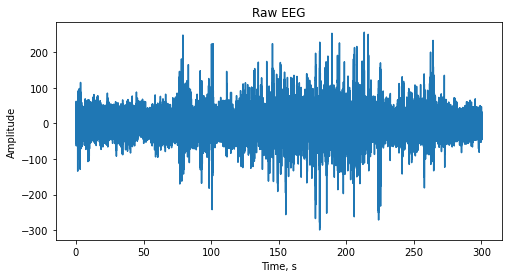

In [4]:
# visualise raw EEG
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, X)
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')
ax.set_title('Raw EEG')

(60001,)
(60001,)


Text(0.5, 1.0, 'Periodogram')

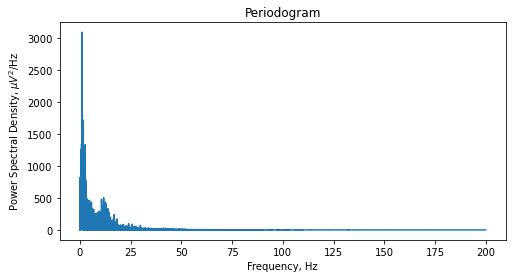

In [11]:
# periodogram of above signal
f, Pxx_den = signal.periodogram(X, sampling_frequency, window='hann')
print(f.shape)
print(Pxx_den.shape)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(f, Pxx_den)
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel(r'Power Spectral Density, $\mu V^2$/Hz')
ax.set_title('Periodogram')

Text(0.5, 1.0, "Welch's Periodogram")

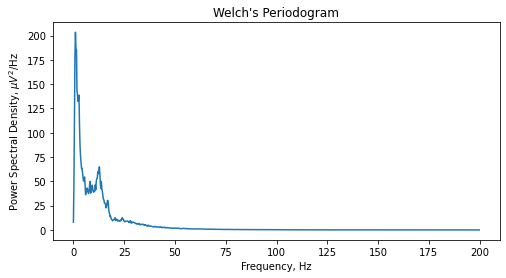

In [6]:
# Welch's periodogram with 4s window
timewindow = 4 * sampling_frequency
f, Pxx_den = signal.welch(X, sampling_frequency, window='hann', nperseg=timewindow)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(f, Pxx_den)
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel(r'Power Spectral Density, $\mu V^2$/Hz')
ax.set_title('Welch\'s Periodogram')

Text(0.5, 1.0, '$\\delta$ band: 0.1 - 4 Hz')

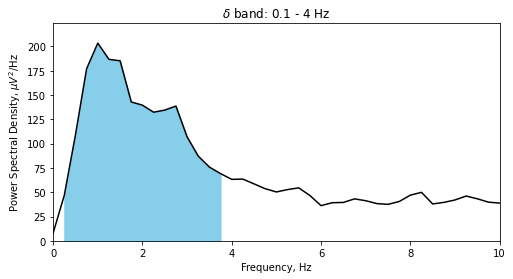

In [9]:
# Delta band: 0.1 - 4 Hz
low, high = 0.1, 4

# intersecting values in frequency vector
idx_delta = np.logical_and(f >= low, f <=high)

# plot power spectral density and colour the delta area
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(f, Pxx_den, color='k')
ax.fill_between(f, Pxx_den, where=idx_delta, color='skyblue')
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel(r'Power Spectral Density, $\mu V^2$/Hz')
ax.set_xlim([0,10])
ax.set_ylim([0, Pxx_den.max() * 1.1])
ax.set_title(r'$\delta$ band: 0.1 - 4 Hz')

In [7]:
# Simpson's rule for approximate numerical integration
f_res = f[1] - f[0] # frequency resolution (i.e. 1/4 = 0.25)
delta_power = simps(Pxx_den[idx_delta], dx=f_res)
print(f'Absolute delta power: {delta_power} micro-V^2')

Absolute delta power: 472.139892578125 micro-V^2


In [8]:
# Relative delta power (expressed as a percentage of total power)
total_power = simps(Pxx_den, dx=f_res)
delta_rel_power = delta_power / total_power
print(f'Relative delta power: {delta_rel_power}')
print(f'Proportion of total power in delta band: {delta_rel_power*100}%')

Relative delta power: 0.3606481574879458
Proportion of total power in delta band: 36.06481574879458%


In [9]:
!pip install --upgrade yasa

In [10]:
import yasa
import pandas as pd

In [11]:
yasa.bandpower(X, sampling_frequency)

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
CHAN000,0.335987,0.178842,0.12581,0.092428,0.163193,0.062465,690.675842,0.250069,True


In [12]:
yasa.bandpower(X, sampling_frequency, bandpass=True)

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
CHAN000,0.335551,0.178857,0.125928,0.092417,0.163319,0.0625,688.866002,0.250069,True


In [13]:
yasa.bandpower(X, sampling_frequency, win_sec=4)

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
CHAN000,0.335987,0.178842,0.12581,0.092428,0.163193,0.062465,690.675842,0.250069,True


In [16]:
timewindow = 4 * sampling_frequency
f, Pxx_den = signal.welch(X, sampling_frequency, window='hann', nperseg=timewindow)
print(f.shape)
print(Pxx_den.shape)
yasa.bandpower_from_psd(Pxx_den, f)

(800,)
(800,)


,Chan,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
0,CHAN000,0.370747,0.145033,0.135077,0.135199,0.132416,0.040811,1217.982666,0.250069,True
